In [2]:
#API imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step1: Download .csv and Github repo
(yeah, done that)

# Step 2: Data Exploration
1. Load data set
---

In [3]:
#read file
df = pd.read_csv("team11_transport.csv") #this process changes when using collab
df.head()

,trip_id,date,route,vehicle_type,time_of_day,passenger_count,delay_minutes,fare_type,payment_method,day_type
0,1,2023-10-01,Route E,Bus,Morning Rush,39.0,0.0,Student,Card,Weekday
1,2,2023-03-06,Route E,Bus,Evening Rush,23.0,0.0,Child,Mobile App,Weekend
2,3,2023-12-09,Route A,Train,Morning Rush,26.0,NaN,Adult,Card,Weekend
3,4,2023-10-20,Route D,Bus,Midday,26.0,3.0,Adult,Cash,Weekday
4,5,2023-10-15,Route A,Bus,Morning Rush,33.0,12.0,Student,Card,Weekend


2. Explore Data Structure and Types
---

In [4]:
#what type of data are we expecting? 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trip_id          1300 non-null   int64  
 1   date             1300 non-null   object 
 2   route            1300 non-null   object 
 3   vehicle_type     1300 non-null   object 
 4   time_of_day      1300 non-null   object 
 5   passenger_count  1237 non-null   float64
 6   delay_minutes    1251 non-null   float64
 7   fare_type        1300 non-null   object 
 8   payment_method   1300 non-null   object 
 9   day_type         1300 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 101.7+ KB


3. Identify data quality issues

In [5]:
#Brief overview of the data at hand
df.describe()

,trip_id,passenger_count,delay_minutes
count,1300.000000,1237.000000,1251.000000
mean,650.500000,30.133387,2.549161
std,375.421985,5.491755,2.997296
min,1.000000,15.000000,0.000000
25%,325.750000,26.000000,0.000000
50%,650.500000,30.000000,2.000000
75%,975.250000,34.000000,4.000000
max,1300.000000,49.000000,19.000000


In [6]:
#dimensions of the CSV
df.shape

(1300, 10)

In [7]:
#sum number of null data for all columns
df.isnull().sum()

trip_id             0
date                0
route               0
vehicle_type        0
time_of_day         0
passenger_count    63
delay_minutes      49
fare_type           0
payment_method      0
day_type            0
dtype: int64

In [8]:
for column in df.columns:
    missing = df[column].isna().sum() / df.shape[0]
    print(f"{column:{15}}: -> {missing * 100:.2f}%")

trip_id        : -> 0.00%
date           : -> 0.00%
route          : -> 0.00%
vehicle_type   : -> 0.00%
time_of_day    : -> 0.00%
passenger_count: -> 4.85%
delay_minutes  : -> 3.77%
fare_type      : -> 0.00%
payment_method : -> 0.00%
day_type       : -> 0.00%


That data contains entries with missing data
3.77% of entered delays in minutes are missing from the data.
4.85% of entered passenger count is missing from data

4. Documented findings:
---





In [9]:
#List all unqiue values in data (This helped us identify inconsistenties and missing values)
for column in df.columns:
    print(f"{column:{15}}: {df[column].unique()}")

trip_id        : [   1    2    3 ... 1298 1299 1300]
date           : ['2023-10-01' '2023-03-06' '2023-12-09' '2023-10-20' '2023-10-15'
 '2023-02-23' '2023-10-31' '2023-07-03' '2023-04-21' '2023-07-27'
 '2023-05-03' '2023-02-07' '2023-11-05' '2023-03-04' '2023-01-01'
 '2023-09-14' '2023-12-19' '2023-05-18' '2023-01-06' '2023-12-31'
 '2023-06-01' '2023-09-22' '2023-06-10' '2023-01-15' '2023-12-12'
 '2023-01-10' '2023-05-26' '2023-01-26' '2023-09-17' '2023-06-18'
 '2023-08-23' '2023-07-19' '2023-12-11' '2023-08-27' '2023-05-13'
 '2023-01-04' '2023-12-29' '2023-01-08' '2023-01-02' '2023-09-01'
 '2023-10-13' '2023-05-15' '2023-10-27' '2023-04-28' '2023-09-20'
 '2023-04-10' '2023-08-28' '2023-03-05' '2023-02-27' '2023-11-13'
 '2023-03-11' '2023-03-31' '2023-10-14' '2023-07-09' '2023-06-17'
 '2023-04-14' '2023-03-07' '2023-04-19' '2023-02-21' '2023-11-14'
 '2023-12-27' '2023-09-10' '2023-10-21' '2023-12-16' '2023-05-05'
 '2023-02-22' '2023-08-07' '2023-02-26' '2023-10-16' '2023-03-27'
 '2023

In [10]:
#account number of each fare type
df['fare_type'].value_counts()

fare_type
Adult      666
Student    295
Senior     184
Child      155
Name: count, dtype: int64

In [11]:
#account number of payment method
df['payment_method'].value_counts()

payment_method
Card          793
Mobile App    271
Cash          236
Name: count, dtype: int64

In [12]:
#account number of day_type
df['day_type'].value_counts()

day_type
Weekday    898
Weekend    402
Name: count, dtype: int64

In [13]:
#account number of vehicle types
df['vehicle_type'].value_counts()

vehicle_type
Bus      662
Train    445
Tram     193
Name: count, dtype: int64

In [14]:
#account number of route types
df['route'].value_counts()

route
Route B    276
Route E    268
Route D    259
Route A    258
Route C    239
Name: count, dtype: int64

In [15]:
#account number of vehicle types
df['vehicle_type'].value_counts()

vehicle_type
Bus      662
Train    445
Tram     193
Name: count, dtype: int64

In [16]:
#account number of time of day
df['time_of_day'].value_counts()

time_of_day
Evening Rush    449
Morning Rush    442
Midday          292
Night           117
Name: count, dtype: int64

### From 1300 total travel route records:
- The transit data handled 1237 total passengers
- Averaging around 30 passengers per route
- 15 to 49 passengers (3.8% incomplete)
- maximum 19 minute delay (4.8% incomplete)
#### Note:


| Fare Type | # |
| ----------- | ----------- |
| Senior | 184 |
| Adult | 666 |
| Student | 295 |
| Child | 155 |

| Payment Method | # |
| ----------- | ----------- |
| Card | 793 |
| Mobile App | 271 |
| Cash | 236 |

| Day Type | # |
| ----------- | ----------- |
| Weekday | 898 |
| Weekend | 402 |

| Vehicle Type | # |
| ----------- | ----------- |
| Bus | 662 |
| Train | 445 |
| Tram | 193 |

| Routes | # |
| ----------- | ----------- |
| B | 276 |
| E | 268 | 
| D | 259 |
| A | 258 |
| C | 239 |


| Time of Day | # |
| ----------- | ----------- |
| Evening Rush | 449 |
| Morning Rush | 442
| Midday | 292 |
| Night | 117 |


# Step 3: Data Cleaning
---
By checking the number of data the data row and columns. We find that only "Passenger Count" and "Delays" contained NaNs and the Dates only contained strings for the date rather than the datetime object.


In [17]:
# get unfiltered shape
df.shape

(1300, 10)

In [18]:
# .dropna() drops all entries with NaN from the table. (Removes all rows with atleast one NaN) 
dfClean = df.dropna(axis=0)

In [19]:
#notice how a few rows have been dropped?
dfClean.shape

(1188, 10)

In [20]:
#Create new variable holding final data. 
dfFixed = dfClean
dfFixed['date'] = pd.to_datetime(dfFixed['date']) #using pandas .to_datetime() to convert entire column into datetime object
dfFixed['route'] = dfFixed['route'].str.replace("Route ","") #remove Route with its route letter

C:\Users\norma\AppData\Local\Temp\ipykernel_3944\718994765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFixed['date'] = pd.to_datetime(dfFixed['date']) #using pandas .to_datetime() to convert entire column into datetime object
C:\Users\norma\AppData\Local\Temp\ipykernel_3944\718994765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFixed['route'] = dfFixed['route'].str.replace("Route ","") #remove Route with its route letter


In [21]:
#Validating using shape and info
dfFixed.head()
#dfFixed.info()
#dfFixed.shape

,trip_id,date,route,vehicle_type,time_of_day,passenger_count,delay_minutes,fare_type,payment_method,day_type
0,1,2023-10-01,E,Bus,Morning Rush,39.0,0.0,Student,Card,Weekday
1,2,2023-03-06,E,Bus,Evening Rush,23.0,0.0,Child,Mobile App,Weekend
3,4,2023-10-20,D,Bus,Midday,26.0,3.0,Adult,Cash,Weekday
4,5,2023-10-15,A,Bus,Morning Rush,33.0,12.0,Student,Card,Weekend
5,6,2023-02-23,C,Bus,Night,24.0,1.0,Adult,Mobile App,Weekend


In [22]:
dfFixed.describe()

,trip_id,date,passenger_count,delay_minutes
count,1188.000000,1188,1188.000000,1188.000000
mean,649.345118,2023-06-26 17:27:16.363636480,30.132997,2.550505
min,1.000000,2023-01-01 00:00:00,15.000000,0.000000
25%,321.750000,2023-03-28 00:00:00,26.000000,0.000000
50%,646.500000,2023-06-20 12:00:00,30.000000,2.000000
75%,976.250000,2023-09-25 00:00:00,34.000000,4.000000
max,1300.000000,2023-12-31 00:00:00,49.000000,19.000000
std,375.840450,NaN,5.502315,3.002943


---
To clean our table, we dropped all entries with a NaN value. This change is only applied to "passanger_count" and "delay_minutes" where either or both contained missing values. 
Additionally, the date has been updated to use the datetime object rather than being a string that represents date and time. Making future operations easier.

With the Clean data, we find that;
- A route contained between 15 to 49 Passengers, the average being 30.1 passengers
- delays were upto 19minutes, average wait being 2.55mins
- delays deviated by upto 3mins from the average

### Question 1: Which route has the highest average delay?
---

In [23]:
# df.groupby groups all unique items and for all same items returns mean of delay_minutes
dfFixed.groupby('route')['delay_minutes'].mean()

route
A    2.694915
B    2.388889
C    2.468182
D    2.877193
E    2.353175
Name: delay_minutes, dtype: float64

In [24]:
#more information about route D
dfFixed[dfFixed['route'] == 'D'].describe()

,trip_id,date,passenger_count,delay_minutes
count,228.000000,228,228.000000,228.000000
mean,653.210526,2023-06-24 18:18:56.842105344,30.903509,2.877193
min,4.000000,2023-01-02 00:00:00,17.000000,0.000000
25%,316.750000,2023-03-18 18:00:00,26.000000,0.000000
50%,659.500000,2023-06-17 00:00:00,31.000000,2.000000
75%,989.000000,2023-10-01 12:00:00,35.000000,4.000000
max,1295.000000,2023-12-31 00:00:00,47.000000,19.000000
std,383.140362,NaN,5.824858,3.423527


### Question 2: How does passenger count differ between peak and off-peak hours?
---

In [25]:
PEAK_LABELS = ["Morning Rush", "Evening Rush"]
dfFixed["is_peak"] = dfFixed["time_of_day"].isin(PEAK_LABELS)
q2_passenger_stats = dfFixed.groupby("is_peak")["passenger_count"].agg(["count", "mean", "median", "std"])
q2_passenger_stats.index = ["Off-Peak", "Peak"]  # False then True, for readability

print(q2_passenger_stats)

peak_mean = q2_passenger_stats.loc["Peak", "mean"]
off_mean = q2_passenger_stats.loc["Off-Peak", "mean"]

print(f"\n Average passengers during PEAK = {peak_mean:.2f}, OFF-PEAK = {off_mean:.2f}.")

          count       mean  median       std
Off-Peak    367  30.065395    30.0  5.383752
Peak        821  30.163216    30.0  5.557475

 Average passengers during PEAK = 30.16, OFF-PEAK = 30.07.


C:\Users\norma\AppData\Local\Temp\ipykernel_3944\2758995279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFixed["is_peak"] = dfFixed["time_of_day"].isin(PEAK_LABELS)


### Question 3: What percentage of trips use each fare type?
---

In [26]:
q3_fare_percent = (dfFixed["fare_type"].value_counts(normalize=True) * 100).sort_values(ascending=False)

print(q3_fare_percent.round(2))

top_fare = q3_fare_percent.index[0]
top_fare_pct = q3_fare_percent.iloc[0]

print(f"\n Most used fare type = '{top_fare}' at {top_fare_pct:.2f}% of trips.")

fare_type
Adult      50.84
Student    22.90
Senior     14.14
Child      12.12
Name: proportion, dtype: float64

 Most used fare type = 'Adult' at 50.84% of trips.


### Questsion 4: How does usage differ between weekdays and weekends?
---

In [27]:
trip_count_col = "trip_id" if "trip_id" in dfFixed.columns else None

q4_usage = dfFixed.groupby("day_type").agg(
    trips=(trip_count_col, "count") if trip_count_col else ("route", "count"),
    total_passengers=("passenger_count", "sum"),
    avg_passengers=("passenger_count", "mean"),
    avg_delay=("delay_minutes", "mean"),
)

print(q4_usage.round(2))

if ("Weekday" in q4_usage.index) and ("Weekend" in q4_usage.index):
    weekday_pass = q4_usage.loc["Weekday", "total_passengers"]
    weekend_pass = q4_usage.loc["Weekend", "total_passengers"]
    bigger = "Weekday" if weekday_pass > weekend_pass else "Weekend"
    print(f"\n Higher total passenger usage occurs on: {bigger}.")
else:
    print("\n day_type values differ from expected ('Weekday'/'Weekend'). Check q4_usage index.")

          trips  total_passengers  avg_passengers  avg_delay
day_type                                                    
Weekday     827           24920.0           30.13       2.65
Weekend     361           10878.0           30.13       2.32

 Higher total passenger usage occurs on: Weekday.


### Question 5: Which vehicle type is most reliable (least delays)?
---


In [28]:
dfFixed["on_time"] = (dfFixed["delay_minutes"] == 0).astype(int)
q5_reliability = dfFixed.groupby("vehicle_type").agg(
    trips=("delay_minutes", "count"),
    avg_delay=("delay_minutes", "mean"),
    median_delay=("delay_minutes", "median"),
    on_time_rate=("on_time", "mean"),  # this is a proportion (0 to 1)
).sort_values(by="avg_delay")

q5_reliability["on_time_rate"] = q5_reliability["on_time_rate"] * 100

best_vehicle = q5_reliability.index[0]
best_vehicle_avg_delay = q5_reliability.iloc[0]["avg_delay"]
best_vehicle_on_time = q5_reliability.iloc[0]["on_time_rate"]

print(q5_reliability.round(2))

print(f"\n Most reliable vehicle type = '{best_vehicle}' "
      f"(avg delay {best_vehicle_avg_delay:.2f} min, on-time {best_vehicle_on_time:.2f}%).") 

              trips  avg_delay  median_delay  on_time_rate
vehicle_type                                              
Tram            181       2.25           1.0         30.94
Bus             605       2.55           2.0         28.93
Train           402       2.69           2.0         28.86

 Most reliable vehicle type = 'Tram' (avg delay 2.25 min, on-time 30.94%).


C:\Users\norma\AppData\Local\Temp\ipykernel_3944\143043756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFixed["on_time"] = (dfFixed["delay_minutes"] == 0).astype(int)


### Question 6:  What is the relationship between passenger count and delays?
---

In [29]:
q6_corr = dfFixed["passenger_count"].corr(dfFixed["delay_minutes"])
print(f"\nCorrelation (passenger count vs delay minutes) = {q6_corr:.4f}")


Correlation (passenger count vs delay minutes) = 0.0096


## Section contains additional data comparisons for derivive relationships
---


# Group 11: Transit Data

## Schema
---
The raw data contained, 1300 entries of transit routes. The table follows the schema:
| Trip ID | Date (yyyy-mm-dd) | Route | Vehicle Type | Time of Day | Passenger Count | Delay (minutes) | Fare Type | Payment Method | Day Type |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |

The table was found to contain missing data in the "Passenger Count" and "Delay" columns. Entries for a "Date" has been represented as a String instead of a datetime Object. These inconsistencies have been fixed, by removing entries with null data, and casting the String containing the initial date into a datetime Object using a panda function.

After cleaning, the number of rows decrease down to 1188 entries. 
- 3.77% "Delays (minutes)" were null.
- 4.85% "Passenger Count" were null.
## Data Analytics
---

| Fare Type | # |
| ----------- | ----------- |
| Senior | 184 |
| Adult | 666 |
| Student | 295 |
| Child | 155 |

| Payment Method | # |
| ----------- | ----------- |
| Card | 793 |
| Mobile App | 271 |
| Cash | 236 |

| Day Type | # |
| ----------- | ----------- |
| Weekday | 898 |
| Weekend | 402 |

| Vehicle Type | # |
| ----------- | ----------- |
| Bus | 662 |
| Train | 445 |
| Tram | 193 |

| Routes | # |
| ----------- | ----------- |
| B | 276 |
| E | 268 | 
| D | 259 |
| A | 258 |
| C | 239 |


| Time of Day | # |
| ----------- | ----------- |
| Evening Rush | 449 |
| Morning Rush | 442
| Midday | 292 |
| Night | 117 |


---
#### Question1:  Which route has the highest average delay?
| Route | A | B | C | D | E |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
| Avg.Delay (minutes) | 2.69 | 2.38 | 2.46 | 2.87 | 2.35 | 

Route D has the longest delay.
- passengers: 17 - 47 (avg. 30)
- longest delay: 19 minutes

#### Question2: How does passenger count differ between peak and off-peak hours?
| count | mean | median | std |
| ----------- | ----------- | ----------- | ----------- |
| Off-Peak | 367 | 30.065395 | 30.0 | 5.383752 |
| Peak | 821 | 30.163216|30.0|5.557475 |

On-Peak sees 454 additional passengers than Off-Peak.  On-peak is categorized as Morning and After Rushes, while Off-Peak is Midday and Midnight times

#### Question3: What percentage of trips use each fare type?
| fare_type | % |
| ----------- | ----------- |
|Adult|50.84|
|Student|22.90|
|Senior|14.14|
|Child|12.12|

Given the data, we find that adults and students passengers are the two most common users of Transit.

#### Question4: How does usage differ between weekdays and weekends?
| day_type | trips | total_passengers | avg_passengers | avg_delay |  
| ----------- | ----------- | ----------- | ----------- | ----------- |                                        
| Weekday | 827 | 24920.0 | 30.13 | 2.65 |
| Weekend | 361 | 10878.0 | 30.13 | 2.32 |

The usage of transit between weekday and weekends, share the same passenger and delay average. Unsurprisingly, the weekday sees about twice the amount of transit users than weekends.

(Notice the cosistent avg. passengers and avg. delays)

#### Question5: Which vehicle type is most reliable (least delays)?
| vehicle_type | trips | avg_delay | median_delay | on_time_rate |                                              
|  ----------- |  ----------- |  ----------- |  ----------- | ----------- |
|Tram|181|2.25|1.0|30.94|
|Bus|605|2.55|2.0|28.93|
|Train|402|2.69|2.0|28.86|

All Vehicles in general appear to have similar on-time frequencies. Statistically, Trams are more likely to be on time than other vehicle types, albeit by a minor margin.

#### Question6: What is the relationship between passenger count and delays?
By calculating the correlation between the number of passengers and delays, find that the two columns has a relation of 0.0096.

Inferring that there is little indication that the data between the number of passengers and delays are directly related.

## Analysis
---
- Delays and Passengers surprisingly do not correlate. The number of passengers the transit take on does not appear to impact the delays a route will gain.
- Given the data, Transit System is made out of:

| Vehicle | Distribution(%) | Passengers(min) | Passengers(max) | Passenger(avg) | Worst Delay(minutes) | Avg. Delay(minutes) |
| ----------- | ----------- | ----------- | ----------- | ----------- |  ----------- |   ----------- |
| Bus | 50.9 | 15 | 48 | 30.12 | 16 | 2.54 | 
| Tram| 33.8 | 15 | 49 | 30.22 | 19 | 2.25 |
|Train| 15.2 | 15 | 47 | 30.10 | 17 | 2.68 |

- For each vehicle type, the average quantity of passengers surprisingly remains similiar. 
- All transit vehicles share the same minimum number of passengers. Maximum number of passengers varying by a single passenger.
- Regardless of vehicle type and passenger quantity, the delay remains the same. Implying 
- The passenger counts are about double during on-Peak hours veruses off-Peak than during
- The passenger count are more than doubled during Weekdays veruses Weeklimit

In [ ]:
#account number of time of day
#dfFixed.info()
#dfFixed.shape
#dfFixed['time_of_day'].value_counts()
#dfFixed['vehicle_type'].value_counts(normalize=True) #get percentage
#dfFixed[dfFixed['vehicle_type'] == 'Bus'].describe() #get bus breakdown
#dfFixed[dfFixed['vehicle_type'] == 'Tram'].describe() 
#dfFixed[dfFixed['vehicle_type'] == 'Train'].describe()

dfFixed["passenger_count"].corr(dfFixed["delay_minutes"])

<class 'pandas.core.frame.DataFrame'>
Index: 1188 entries, 0 to 1299
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   trip_id          1188 non-null   int64         
 1   date             1188 non-null   datetime64[ns]
 2   route            1188 non-null   object        
 3   vehicle_type     1188 non-null   object        
 4   time_of_day      1188 non-null   object        
 5   passenger_count  1188 non-null   float64       
 6   delay_minutes    1188 non-null   float64       
 7   fare_type        1188 non-null   object        
 8   payment_method   1188 non-null   object        
 9   day_type         1188 non-null   object        
 10  is_peak          1188 non-null   bool          
 11  on_time          1188 non-null   int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(1), object(6)
memory usage: 107.9+ KB


0.009586525924990747

# Graphs

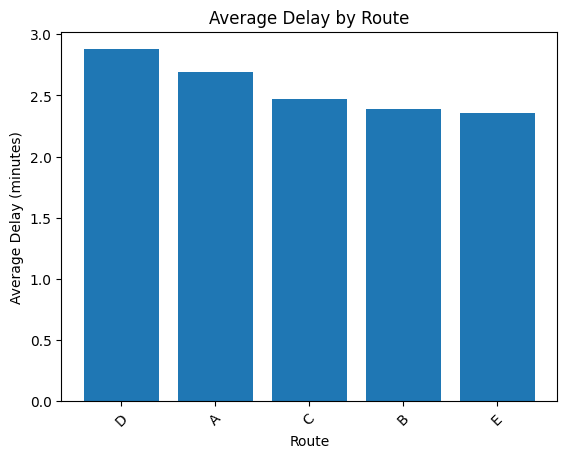

In [36]:
q1_avg_delay_by_route = dfFixed.groupby("route")["delay_minutes"].mean().sort_values(ascending=False)

plt.figure()

plt.bar(q1_avg_delay_by_route.index,
        q1_avg_delay_by_route.values)

plt.xlabel("Route")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Delay by Route")

plt.xticks(rotation=45)

plt.show()

Allows us to compare the average delay in correspondence to route chosen.

<Figure size 640x480 with 0 Axes>

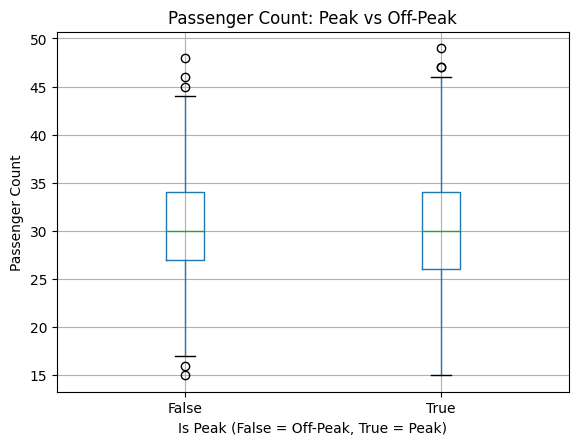

In [37]:
PEAK_LABELS = ["Morning Rush", "Evening Rush"]
df["is_peak"] = dfFixed["time_of_day"].isin(PEAK_LABELS)

plt.figure()

df.boxplot(column="passenger_count", by="is_peak")

plt.title("Passenger Count: Peak vs Off-Peak")
plt.suptitle("")  # removes automatic subtitle
plt.xlabel("Is Peak (False = Off-Peak, True = Peak)")
plt.ylabel("Passenger Count")

plt.show()

According to this boxplot graph, we can observe that the passenger count is very similar in variability and has the same median. Which doesn't show the number of passengers aren't much affected whether its peak or not.

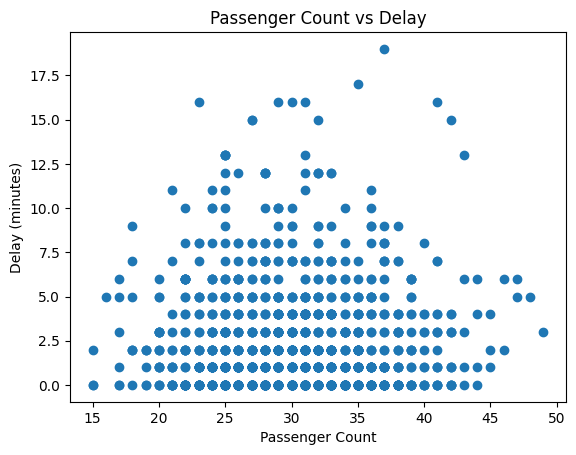

In [38]:
plt.figure()

plt.scatter(dfFixed["passenger_count"], dfFixed["delay_minutes"])

plt.xlabel("Passenger Count")
plt.ylabel("Delay (minutes)")
plt.title("Passenger Count vs Delay")

plt.show()

We can observe here that overall the delay time isn't very correlated to the passenger count. The data points show a spread or evened-out representation. Which backs our result earlier with the pearson correlation being as low as 0.0096

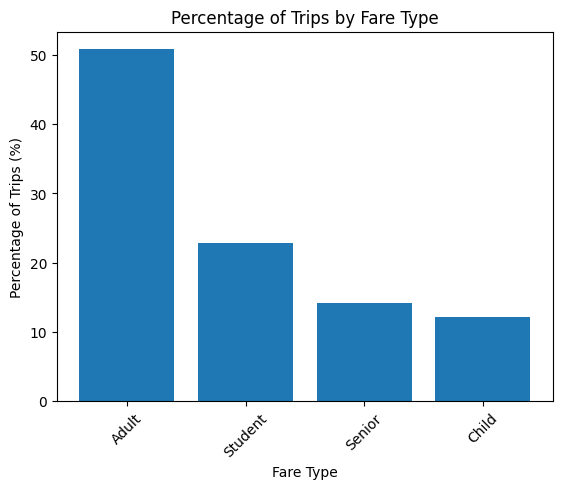

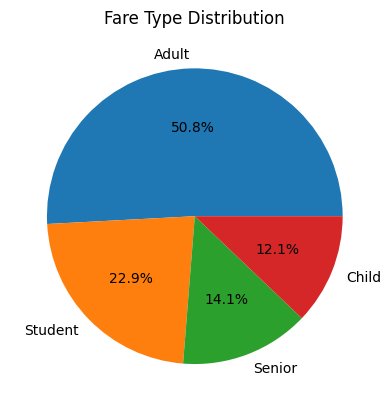

In [39]:
plt.figure()
#bar graph
plt.bar(q3_fare_percent.index,
        q3_fare_percent.values)

plt.xlabel("Fare Type")
plt.ylabel("Percentage of Trips (%)")
plt.title("Percentage of Trips by Fare Type")

plt.xticks(rotation=45)

plt.show()

print("\n")
#pie
plt.pie(q3_fare_percent.values,
        labels=q3_fare_percent.index,
        autopct='%1.1f%%')

plt.title("Fare Type Distribution")

plt.show()

These graphs allow us to see the fare type distirbution.